## Data Cleaning

### 1. Data Inspection and Understanding

In [1]:
import pandas as pd

df= pd.read_csv('RT_IOT2022.csv')
df.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [2]:
df.shape

(123117, 85)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [4]:
df.describe()

,Unnamed: 0,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,37035.089248,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,30459.106367,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,6059.000000,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,33100.000000,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,63879.000000,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,94658.000000,65535.000000,65389.000000,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


In [5]:
# print numeric columns

numeric_df = df.select_dtypes(exclude=['object'])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 82 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   flow_duration             123117 non-null  float64
 4   fwd_pkts_tot              123117 non-null  int64  
 5   bwd_pkts_tot              123117 non-null  int64  
 6   fwd_data_pkts_tot         123117 non-null  int64  
 7   bwd_data_pkts_tot         123117 non-null  int64  
 8   fwd_pkts_per_sec          123117 non-null  float64
 9   bwd_pkts_per_sec          123117 non-null  float64
 10  flow_pkts_per_sec         123117 non-null  float64
 11  down_up_ratio             123117 non-null  float64
 12  fwd_header_size_tot       123117 non-null  int64  
 13  fwd_header_size_min       123117 non-null  i

In [6]:
# print object columns

object_df = df.select_dtypes(include=['object'])
object_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   proto        123117 non-null  object
 1   service      123117 non-null  object
 2   Attack_type  123117 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB


In [7]:
# print all atributes in proto, serviceand Attack_type

print(df['proto'].unique())
print(df['service'].unique())
print(df['Attack_type'].unique())

['tcp' 'udp' 'icmp']
['mqtt' '-' 'http' 'dns' 'ntp' 'ssl' 'dhcp' 'irc' 'ssh' 'radius']
['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


### 2. Handling Missing Values & Remove Duplicated Datas

- Remove Useless Columns ( id.orig_p, id.resp_p, Unnamed: 0)
- Remove duplicate values

In [8]:
df.isnull().sum()

Unnamed: 0              0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

In [9]:
df.dropna()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,2005,59247,63331,tcp,-,0.000006,1,1,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,2006,59247,64623,tcp,-,0.000007,1,1,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,2007,59247,64680,tcp,-,0.000006,1,1,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,2008,59247,65000,tcp,-,0.000006,1,1,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


In [10]:
# drop cols
df.drop(columns=['id.orig_p', 'id.resp_p', 'Unnamed: 0'], inplace=True, errors='ignore')
df.columns

Index(['proto', 'service', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkt

In [11]:
df.drop_duplicates()

,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,tcp,mqtt,32.011598,9,5,3,3,0.281148,0.156193,4.373410e-01,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,tcp,mqtt,31.883584,9,5,3,3,0.282277,0.156821,4.390970e-01,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,tcp,mqtt,32.124053,9,5,3,3,0.280164,0.155647,4.358110e-01,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,tcp,mqtt,31.961063,9,5,3,3,0.281593,0.156440,4.380330e-01,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,tcp,mqtt,31.902362,9,5,3,3,0.282111,0.156728,4.388390e-01,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122810,tcp,-,0.000017,1,1,0,0,58254.222222,58254.222222,1.165084e+05,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
122831,tcp,-,0.000001,1,1,0,0,838860.800000,838860.800000,1.677722e+06,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
122865,tcp,-,0.000026,1,1,0,0,38130.036364,38130.036364,7.626007e+04,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
122999,tcp,-,0.000012,1,1,0,0,82241.254902,82241.254902,1.644825e+05,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


### 3. Data Type Conversion

- ARP posioning to ARP poisoning
- convert object proto, service, Attack_type to numeric
- binary labelling: normal = 0, attack = 1

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
proto_encoder = LabelEncoder()
service_encoder = LabelEncoder()

In [14]:
df['proto_encoded'] = proto_encoder.fit_transform(df['proto'])
df['service_encoded'] = service_encoder.fit_transform(df['service'])

In [15]:
# Show the count for each Attack_type
attack_counts = df['Attack_type'].value_counts()
print(attack_counts)

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


<Axes: xlabel='Attack_type'>

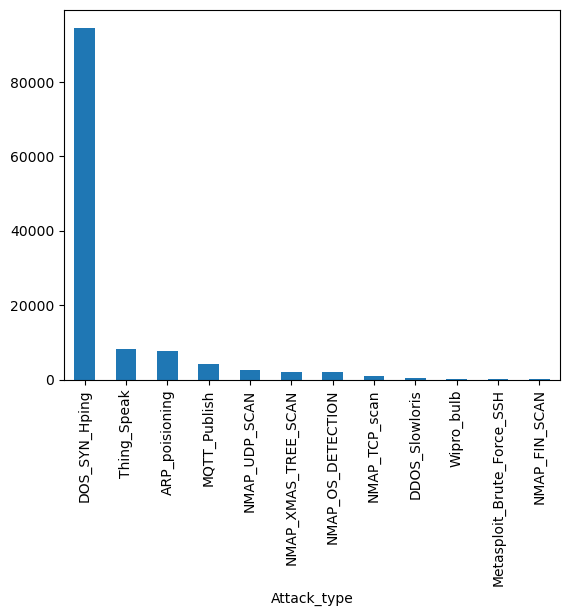

In [16]:
df['Attack_type'].value_counts().plot(kind='bar')

In [17]:
# Replace 'poisoning' with 'Poisoning' in the 'attack_type' column
df['Attack_type'] = df['Attack_type'].replace('ARP_poisioning', 'ARP_poisoning')

In [18]:
normal = ['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb']
df['binary_label'] = df['Attack_type'].apply(lambda x: 0 if x in normal else 1)

Mapping attack types to its class for future references.

In [19]:
def map_multiclass(attack):
    if attack in ['MQTT_Publish', 'Thing_Speak', 'Wipro_bulb']:
        return 'Normal'
    elif attack.startswith('NMAP'):
        return 'Reconnaissance'
    elif 'Slowloris' in attack or 'SYN_Hping' in attack:
        return 'DoS'
    elif 'Metasploit' in attack:
        return 'Exploitation'
    elif 'poisoning' in attack:
        return 'MITM'
    else:
        return 'Other'

In [20]:
df['attack_class'] = df['Attack_type'].apply(map_multiclass)

Save the data into new csv file as cleaned_RTIoT2022.csv

In [21]:
df.to_csv("cleaned_RTIoT2022.csv", index=False)

### 4. Exploratory Data Analysis

- Class distribution (Imbalance Checking)
- Feature Correlation
- Compare means, medians, and standard deviations across normal vs anomaly.

In [22]:
df = pd.read_csv("cleaned_RTIoT2022.csv")

In [23]:
# class imbalance check

# Count and percentage
attack_counts = df['binary_label'].value_counts()
attack_percent = df['binary_label'].value_counts(normalize=True) * 100

# Combine into a DataFrame for easy viewing
imbalance_df = pd.DataFrame({'Count': attack_counts, 'Percentage': attack_percent.round(2)})
print(imbalance_df)

               Count  Percentage
binary_label                    
1             110610       89.84
0              12507       10.16


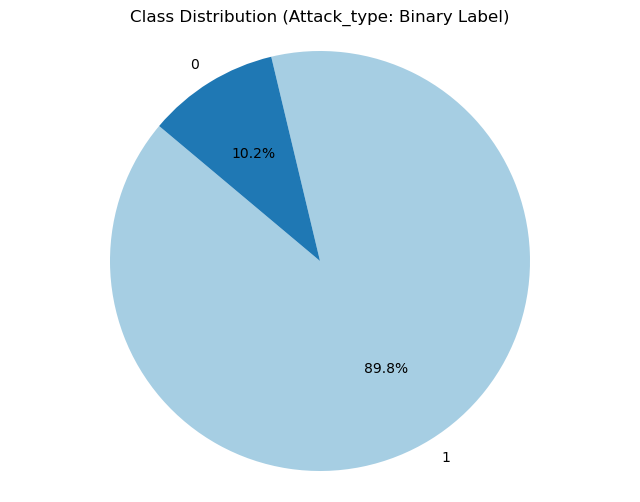

In [24]:
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    attack_counts,
    labels=attack_counts.index,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Class Distribution (Attack_type: Binary Label)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()

In [25]:
# numerical features distribution
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd

                      Var1                      Var2  Correlation
80                   proto             proto_encoded     1.000000
164                service           service_encoded     1.000000
217          flow_duration              flow_iat.tot     1.000000
644       bwd_pkts_per_sec         flow_pkts_per_sec     0.999997
568       fwd_pkts_per_sec         flow_pkts_per_sec     0.999997
567       fwd_pkts_per_sec          bwd_pkts_per_sec     0.999986
3318        bwd_bulk_bytes          bwd_bulk_packets     0.999802
3062          flow_iat.max                  idle.max     0.999748
2718           fwd_iat.tot              flow_iat.tot     0.999719
207          flow_duration               fwd_iat.tot     0.999719
2676           fwd_iat.max              flow_iat.max     0.996647
2697           fwd_iat.max                  idle.max     0.996389
3505              idle.max                  idle.avg     0.995069
238          flow_duration                  idle.tot     0.995023
3094      

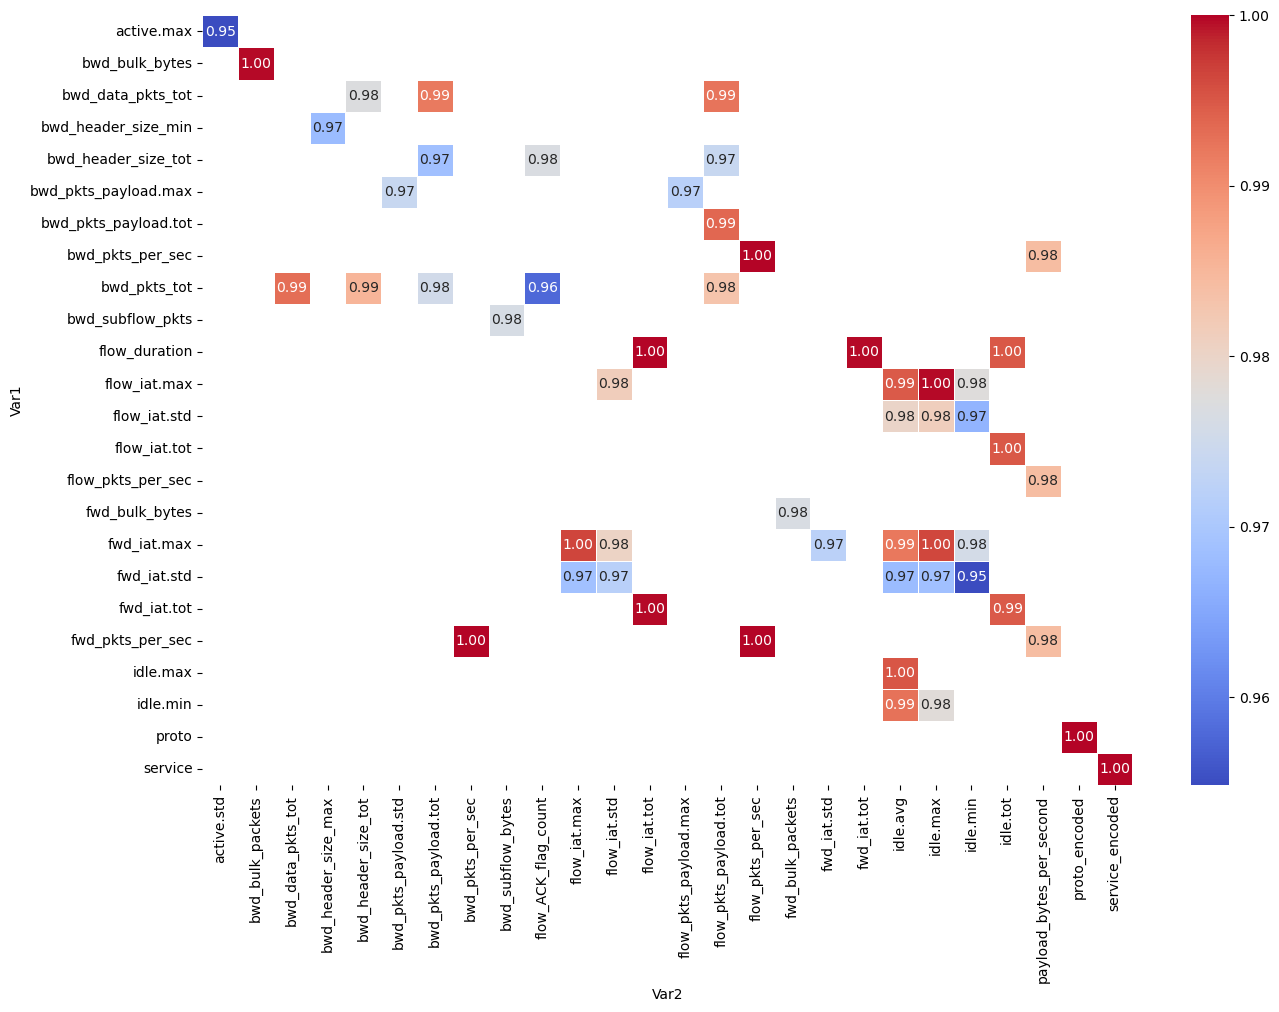

In [26]:
# feature correlation

import seaborn as sns
import numpy as np

# Function to simplify correlation matrix
def corr_simple(data, sig=0.5):
    # Convert object columns (non-numeric) to numeric by converting them to category codes
    df_cor = data.copy()
    df_cor = df_cor.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

    # Compute the correlation matrix
    corr = df_cor.corr()

    # Set the lower triangle and diagonal to NaN (to drop perfect correlations and duplicates)
    corr.values[np.tril_indices_from(corr, k=0)] = np.nan

    # Flatten the matrix into a 3-column table (variable 1, variable 2, correlation)
    corr_table = corr.stack().reset_index()
    corr_table.columns = ['Var1', 'Var2', 'Correlation']

    # Drop correlations below the significance level
    corr_filtered = corr_table[corr_table['Correlation'].abs() > sig].sort_values(by='Correlation', ascending=False)

    # Display the filtered correlations
    print(corr_filtered)

    # Convert back to a correlation matrix for visualization
    mtx_corr = corr_filtered.pivot(index='Var1', columns='Var2', values='Correlation')

    # Plot the correlation matrix
    plt.figure(figsize=(15, 10))
    sns.heatmap(mtx_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Applying it to your dataset
corr_simple(df, sig=0.95)

In [27]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

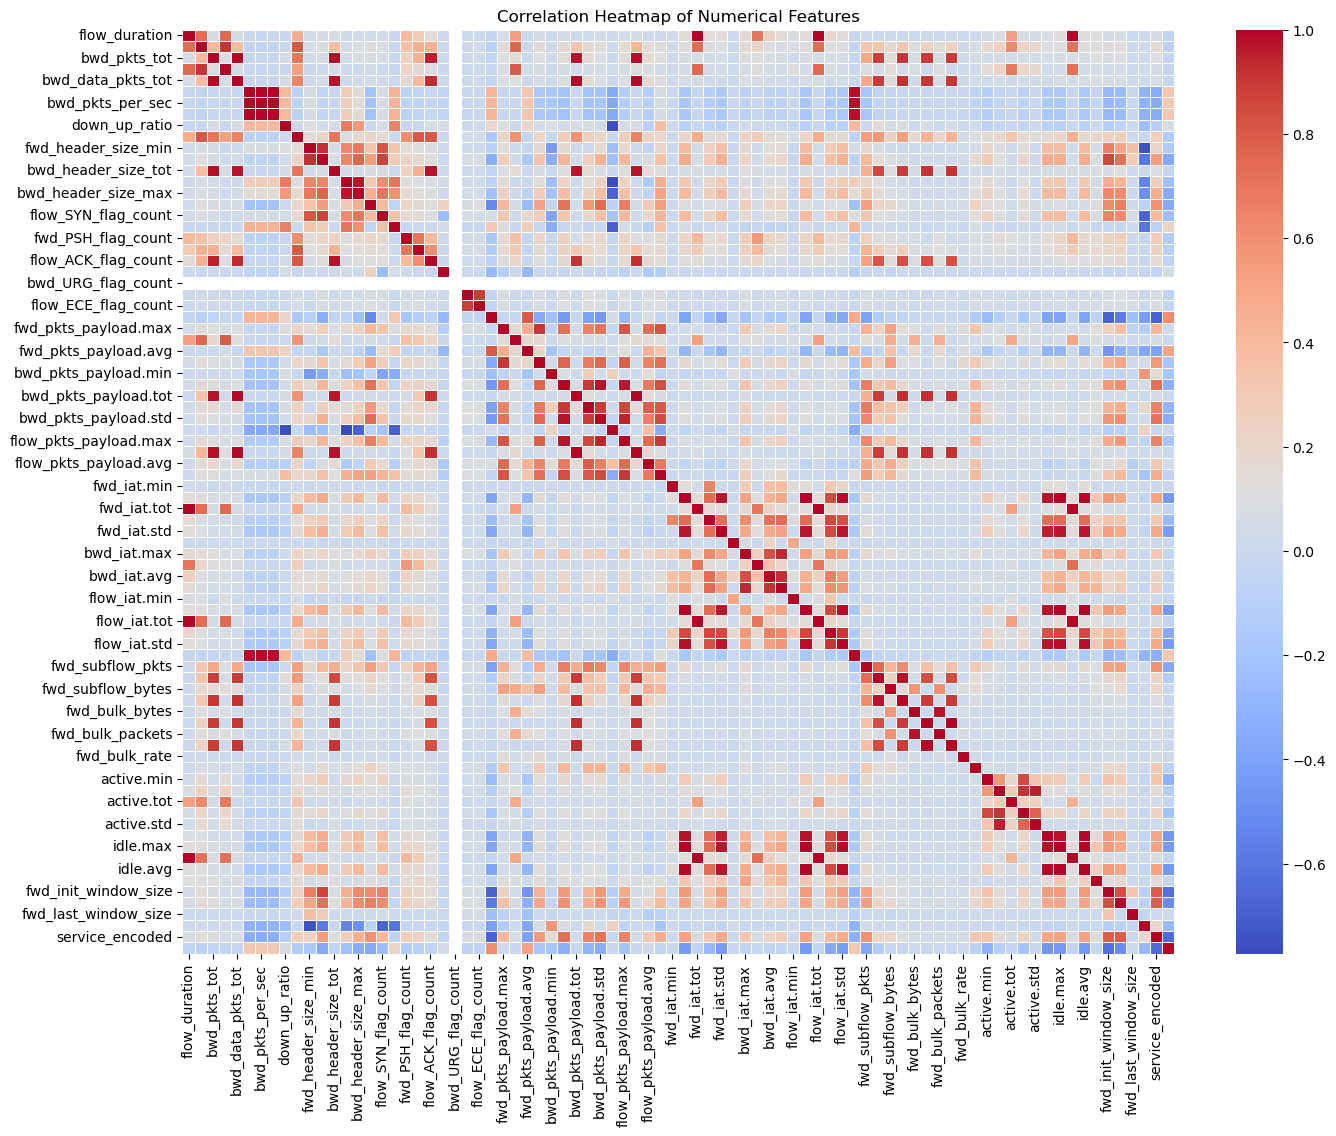

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [29]:
# Flatten the matrix and sort
correlation_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)

# Filter to exclude self-correlations and duplicates
high_corr = correlation_pairs[(correlation_pairs < 1.0) & (correlation_pairs > 0.9)]

print("Highly correlated feature pairs:")
print(high_corr)

Highly correlated feature pairs:
flow_iat.tot          flow_duration           1.000000
flow_duration         flow_iat.tot            1.000000
bwd_pkts_per_sec      flow_pkts_per_sec       0.999997
flow_pkts_per_sec     bwd_pkts_per_sec        0.999997
                      fwd_pkts_per_sec        0.999997
                                                ...   
fwd_pkts_payload.max  fwd_pkts_payload.std    0.907555
bwd_pkts_tot          bwd_subflow_bytes       0.906951
bwd_subflow_bytes     bwd_pkts_tot            0.906951
flow_iat.std          flow_iat.avg            0.903189
flow_iat.avg          flow_iat.std            0.903189
Length: 150, dtype: float64


In [30]:
grouped = df.groupby('binary_label')

means = grouped[numeric_cols].mean().rename(index={0: 'Normal', 1: 'Anomaly'})
medians = grouped[numeric_cols].median().rename(index={0: 'Normal', 1: 'Anomaly'})
stds = grouped[numeric_cols].std().rename(index={0: 'Normal', 1: 'Anomaly'})

summary_stats = pd.concat([means, medians, stds], axis=1, keys=['Mean', 'Median', 'Std'])

print(summary_stats)

                      Mean                                              \
             flow_duration fwd_pkts_tot bwd_pkts_tot fwd_data_pkts_tot   
binary_label                                                             
Normal           26.862771     8.496762     5.976253          3.778444   
Anomaly           1.202872     1.564614     1.449670          1.210334   

                                                                  \
             bwd_data_pkts_tot fwd_pkts_per_sec bwd_pkts_per_sec   
binary_label                                                       
Normal                4.030783        29.181261        29.753750   
Anomaly               0.457237    391582.810534    391533.361731   

                                                                  ...  \
             flow_pkts_per_sec down_up_ratio fwd_header_size_tot  ...   
binary_label                                                      ...   
Normal               58.935011      0.772563          224.401055  ...

In [31]:
mean_diff = abs(means.loc['Normal'] - means.loc['Anomaly'])
top5_features = mean_diff.sort_values(ascending=False).head(5).index.tolist()
print("Top 5 features with biggest mean difference:", top5_features)

Top 5 features with biggest mean difference: ['payload_bytes_per_second', 'flow_iat.tot', 'fwd_iat.tot', 'idle.tot', 'flow_iat.max']


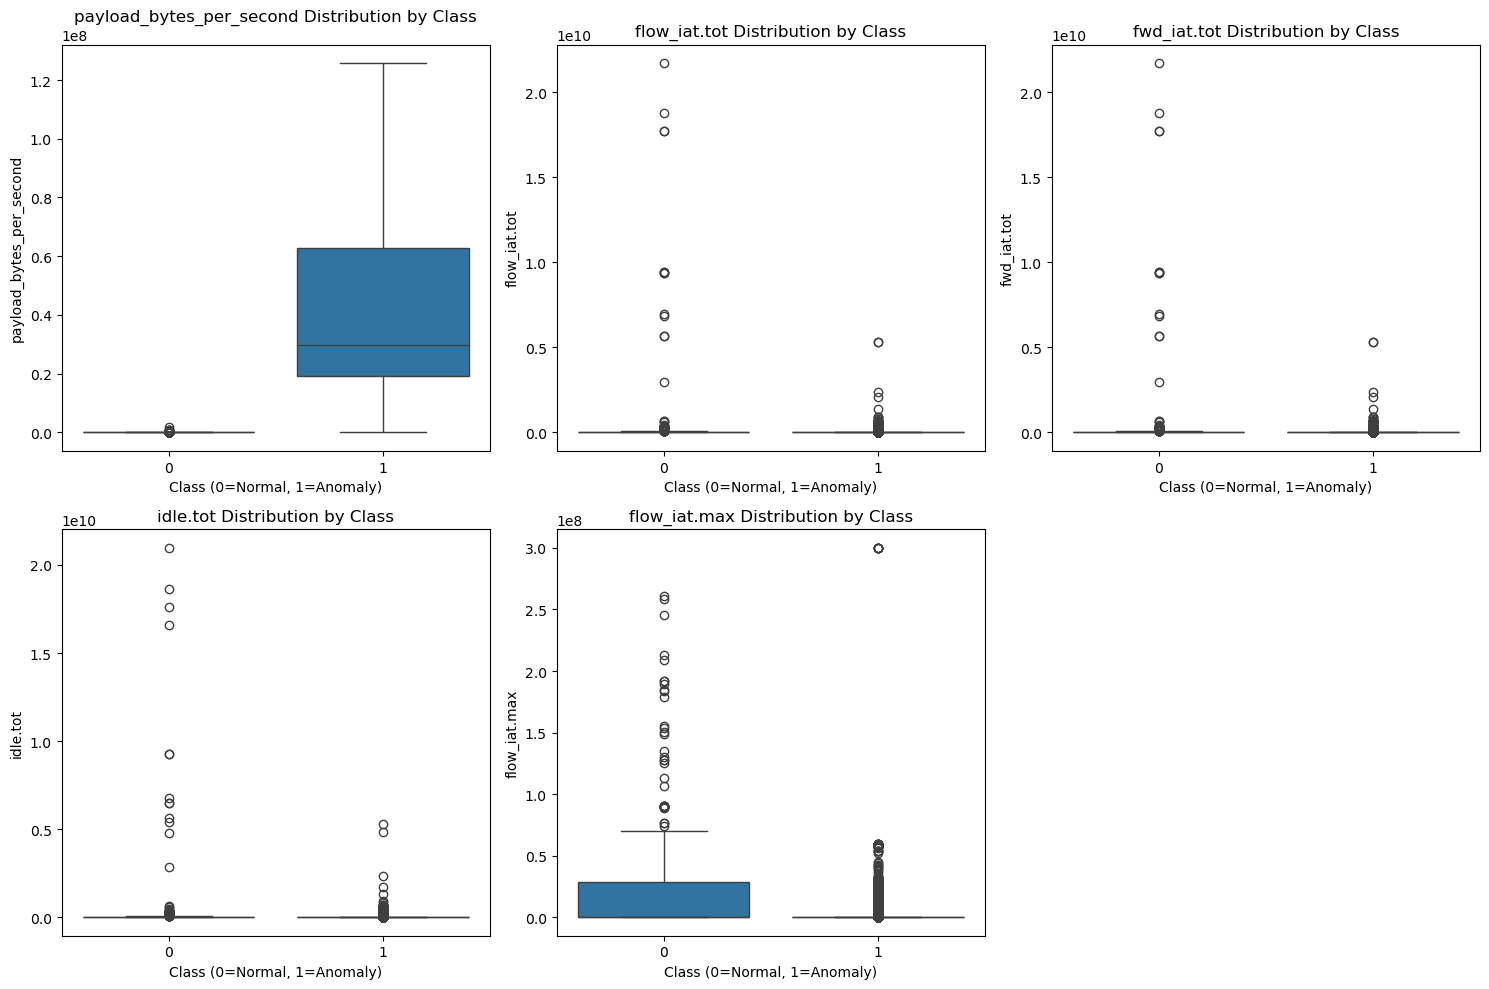

In [32]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top5_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='binary_label', y=feature, data=df)
    plt.title(f"{feature} Distribution by Class")
    plt.xlabel("Class (0=Normal, 1=Anomaly)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### 5. Data Splitting

In [33]:
object_cols = df.select_dtypes(include=['object'])
object_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   proto         123117 non-null  object
 1   service       123117 non-null  object
 2   Attack_type   123117 non-null  object
 3   attack_class  123117 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


In [34]:
X = df.drop(['binary_label', 'attack_class', 'proto','service', 'Attack_type'], axis = 1)
y = df['binary_label']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [36]:
from sklearn.model_selection import train_test_split

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (86181, 81)
X_test shape: (36936, 81)
y_train shape: (86181,)
y_test shape: (36936,)


### 7. Data Normalization

- using MinMaxScaler

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [38]:
print("Min values per feature in scaled training data:")
print(X_train_scaled.min(axis=0))

print("Max values per feature in scaled training data:")
print(X_train_scaled.max(axis=0))

Min values per feature in scaled training data:
flow_duration           0.0
fwd_pkts_tot            0.0
bwd_pkts_tot            0.0
fwd_data_pkts_tot       0.0
bwd_data_pkts_tot       0.0
                       ... 
fwd_init_window_size    0.0
bwd_init_window_size    0.0
fwd_last_window_size    0.0
proto_encoded           0.0
service_encoded         0.0
Length: 81, dtype: float64
Max values per feature in scaled training data:
flow_duration           1.0
fwd_pkts_tot            1.0
bwd_pkts_tot            1.0
fwd_data_pkts_tot       1.0
bwd_data_pkts_tot       1.0
                       ... 
fwd_init_window_size    1.0
bwd_init_window_size    1.0
fwd_last_window_size    1.0
proto_encoded           1.0
service_encoded         1.0
Length: 81, dtype: float64


### 6. Handling Class Imbalance

-  SMOTE
-  Undersampling and Oversampling (whichever is suitable)

In [39]:
print(y.value_counts())
print(y.value_counts(normalize=True))  # Shows percentage

binary_label
1    110610
0     12507
Name: count, dtype: int64
binary_label
1    0.898414
0    0.101586
Name: proportion, dtype: float64


In [40]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

In [41]:
from collections import Counter

print(Counter(y_train_sm))         # After SMOTE

Counter({1: 77426, 0: 77426})


### 8. Feature Selection


In [42]:
from sklearn.feature_selection import mutual_info_classif

info_gain = mutual_info_classif(X_train_sm, y_train_sm, random_state=42)

ig_df = pd.DataFrame({
    'Feature': X_train_sm.columns,
    'InfoGain': info_gain
}).sort_values(by='InfoGain', ascending=False).reset_index(drop=True)

k = 20  
top_k_features = ig_df.head(k)['Feature'].tolist()

percentile = 0.90  
threshold_value = np.percentile(ig_df['InfoGain'], percentile * 100)
top_percentile_features = ig_df[ig_df['InfoGain'] >= threshold_value]['Feature'].tolist()

In [43]:
print(f"Top {k} features:\n", top_k_features)
print(f"\nFeatures above {int(percentile*100)}th percentile (threshold={threshold_value:.4f}):\n", top_percentile_features)

X_train_top_k = X_train_sm[top_k_features]
X_test_top_k = X_test_scaled[top_k_features]  

X_train_percentile = X_train_sm[top_percentile_features]
X_test_percentile = X_test_scaled[top_percentile_features]

Top 20 features:
 ['fwd_pkts_payload.avg', 'flow_pkts_payload.tot', 'fwd_subflow_bytes', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'flow_iat.min', 'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'flow_pkts_payload.max', 'flow_iat.tot', 'flow_duration', 'flow_iat.max', 'active.max', 'active.avg', 'active.tot', 'active.min', 'payload_bytes_per_second', 'bwd_subflow_bytes', 'flow_pkts_per_sec', 'bwd_pkts_payload.tot']

Features above 90th percentile (threshold=0.6246):
 ['fwd_pkts_payload.avg', 'flow_pkts_payload.tot', 'fwd_subflow_bytes', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'flow_iat.min', 'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'flow_pkts_payload.max']


### 9. Classification & Evaluation

Classfication
- Decision Trees
- Logistic Regression
- Random Forest
- Support Vector Machine
- K-Nearest Neighbors
- Gradient Boosting Regression

Evaluation
- K-Cross Validation (5)
- Confusion Matrix
- ROC Curve

In [44]:
print("Train Set: ")
print(y_train_sm.value_counts())
print("Test Set: ")
print(y_test.value_counts())

Train Set: 
binary_label
1    77426
0    77426
Name: count, dtype: int64
Test Set: 
binary_label
1    33184
0     3752
Name: count, dtype: int64


In [45]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

results = []
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Try to get probability scores for ROC curve
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        try:
            y_proba = model.decision_function(X_test)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
        except:
            y_proba = None
    
    # 🔹 Key Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC:   {roc_auc:.4f}")

    # 🔹 Cross-validation (F1)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    print(f"5-Fold CV F1-score: Mean={cv_f1.mean():.4f}, Std={cv_f1.std():.4f}")
    
    # 🔹 Visualization
    plt.figure(figsize=(12, 5))

    # Confusion Matrix Heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # ROC Curve
    plt.subplot(1, 2, 2)
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"{model_name} - ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
    else:
        plt.text(0.5, 0.5, "ROC Curve\nNot Available", ha='center', va='center')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    global results
    results.append({
    'ModelName': model_name,
    'Accuracy': round(acc, 4),
    'Precision': round(prec, 4),
    'Recall': round(rec, 4),
    'F1_score': round(f1, 4),
    'ROC_AUC': round(roc_auc, 4),
    'CV_F1_mean': round(cv_f1.mean(), 4),
    'CV_F1_std': round(cv_f1.std(), 4)
})


Decision Trees


--- Decision Tree (Top-20) ---
Accuracy:  0.9960
Precision: 0.9989
Recall:    0.9966
F1-score:  0.9978
ROC AUC:   0.9955
5-Fold CV F1-score: Mean=0.9969, Std=0.0003


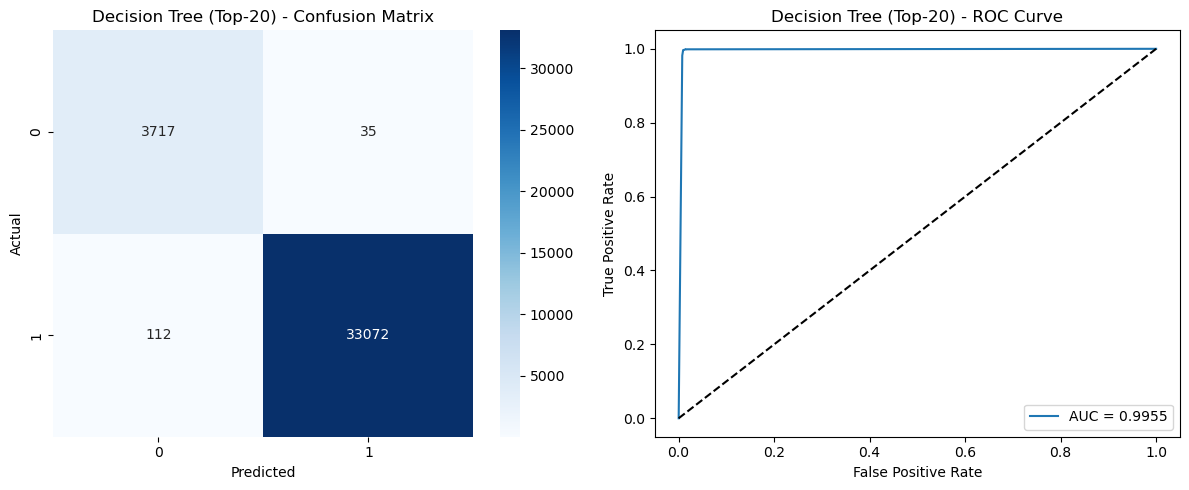

In [47]:
dt_top_k = DecisionTreeClassifier(random_state=42)
dt_top_k.fit(X_train_top_k, y_train_sm)
evaluate_model(dt_top_k, X_train_top_k, y_train_sm, X_test_top_k, y_test, model_name="Decision Tree (Top-20)")


--- Decision Tree (Percentile) ---
Accuracy:  0.9964
Precision: 0.9991
Recall:    0.9969
F1-score:  0.9980
ROC AUC:   0.9960
5-Fold CV F1-score: Mean=0.9972, Std=0.0002


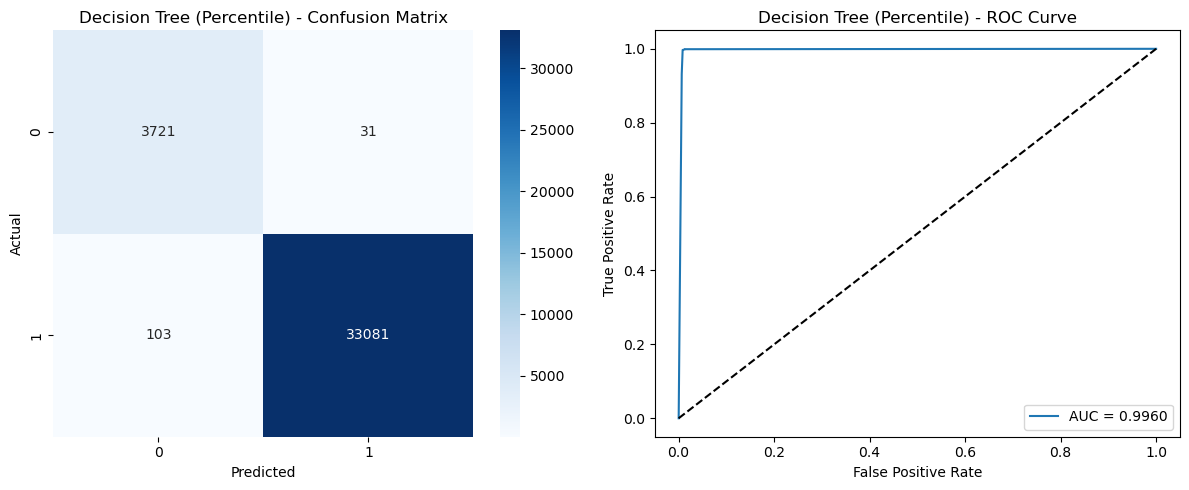

In [48]:
dt_percentile = DecisionTreeClassifier(random_state=42)
dt_percentile.fit(X_train_percentile, y_train_sm)
evaluate_model(dt_percentile, X_train_percentile, y_train_sm, X_test_percentile, y_test, model_name="Decision Tree (Percentile)")

Logistic Regression


--- Logistic Regression (Top-20) ---
Accuracy:  0.9017
Precision: 0.9984
Recall:    0.8919
F1-score:  0.9422
ROC AUC:   0.9803
5-Fold CV F1-score: Mean=0.9370, Std=0.0006


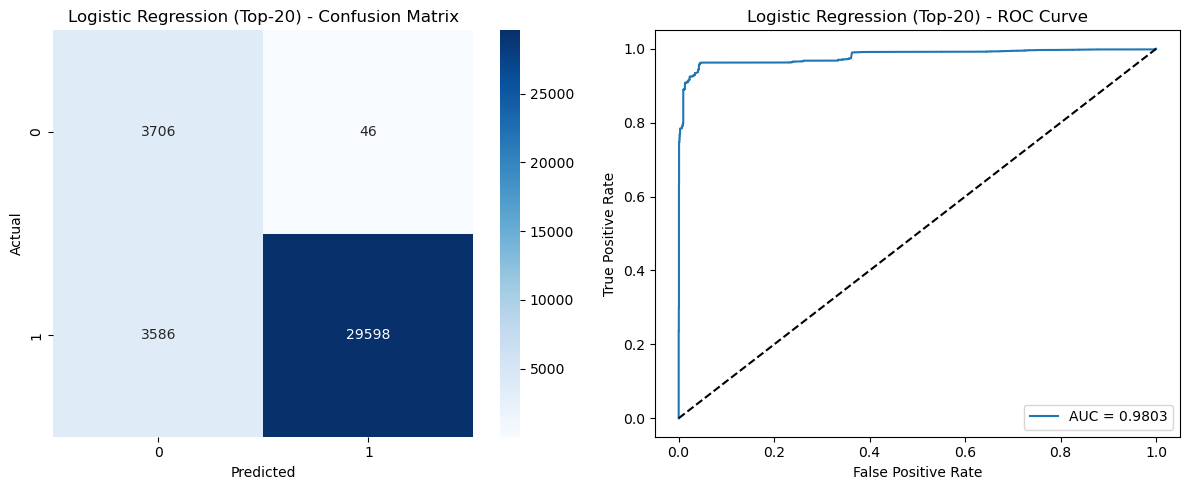

In [49]:
lr_top_k = LogisticRegression(max_iter=10000, random_state=42)
lr_top_k.fit(X_train_top_k, y_train_sm)
evaluate_model(lr_top_k, X_train_top_k, y_train_sm, X_test_top_k, y_test, model_name="Logistic Regression (Top-20)")


--- Logistic Regression (Percentile) ---
Accuracy:  0.8726
Precision: 0.9983
Recall:    0.8597
F1-score:  0.9238
ROC AUC:   0.9379
5-Fold CV F1-score: Mean=0.9210, Std=0.0008


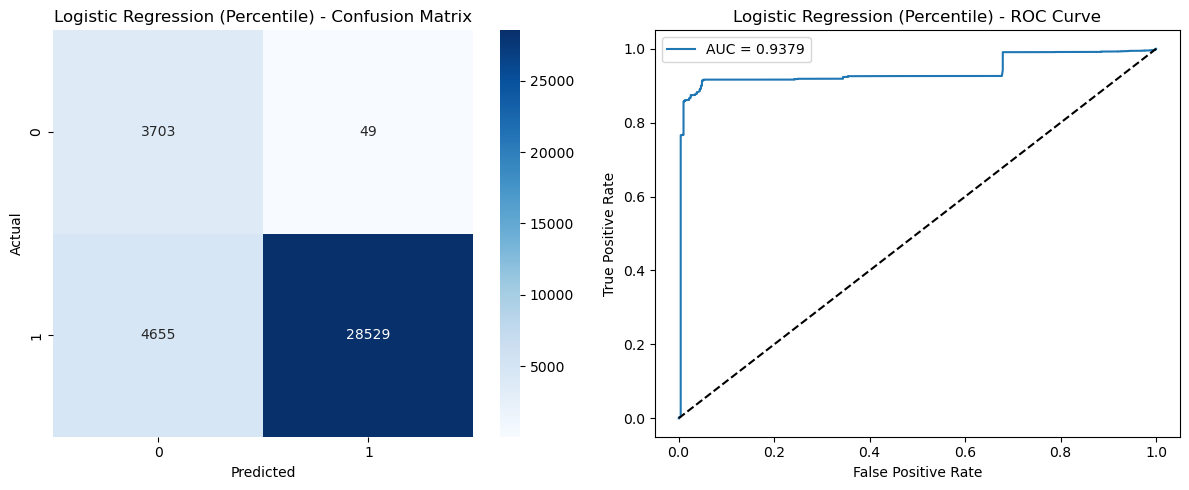

In [50]:
lr_percentile = LogisticRegression(max_iter=10000, random_state=42)
lr_percentile.fit(X_train_percentile, y_train_sm)
evaluate_model(lr_percentile, X_train_percentile, y_train_sm, X_test_percentile, y_test, model_name="Logistic Regression (Percentile)")

Random Forest


--- Random Forest (Top-20) ---
Accuracy:  0.9965
Precision: 0.9992
Recall:    0.9969
F1-score:  0.9980
ROC AUC:   0.9999
5-Fold CV F1-score: Mean=0.9976, Std=0.0003


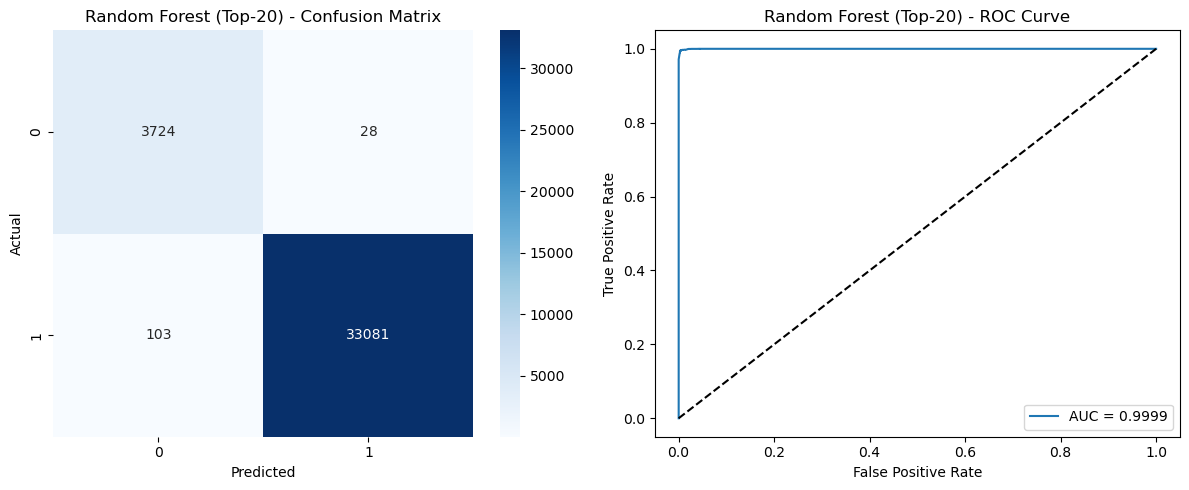

In [51]:
rf_top_k = RandomForestClassifier(random_state=42)
rf_top_k.fit(X_train_top_k, y_train_sm)
evaluate_model(rf_top_k, X_train_top_k, y_train_sm, X_test_top_k, y_test, model_name="Random Forest (Top-20)")


--- Random Forest (Percentile) ---
Accuracy:  0.9969
Precision: 0.9993
Recall:    0.9973
F1-score:  0.9983
ROC AUC:   0.9997
5-Fold CV F1-score: Mean=0.9977, Std=0.0003


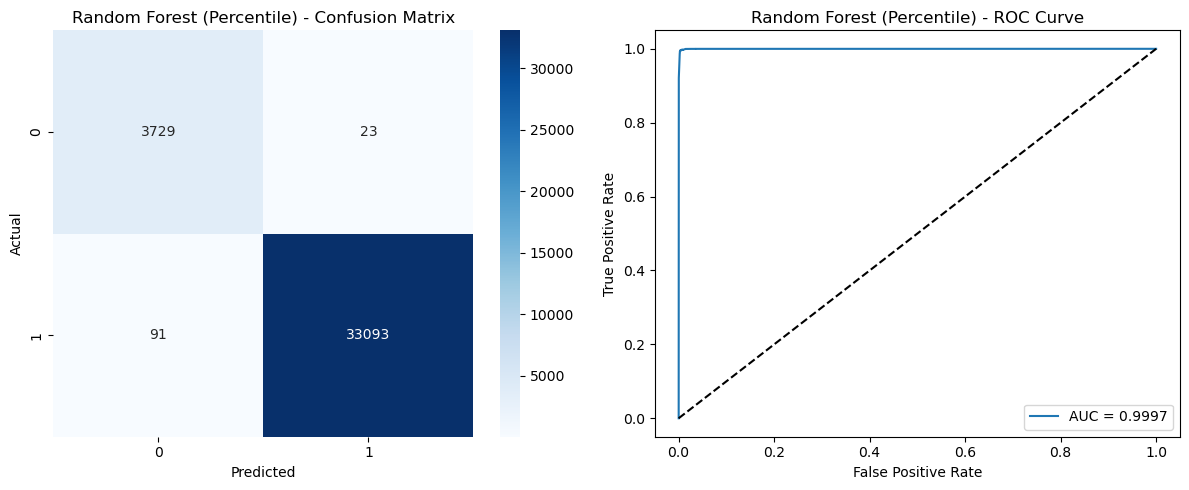

In [52]:
rf_percentile = RandomForestClassifier(random_state=42)
rf_percentile.fit(X_train_percentile, y_train_sm)
evaluate_model(rf_percentile, X_train_percentile, y_train_sm, X_test_percentile, y_test, model_name="Random Forest (Percentile)")

Support Vector Machine


--- Support Vector Machine (Top-20) ---
Accuracy:  0.9110
Precision: 0.9987
Recall:    0.9022
F1-score:  0.9480
ROC AUC:   0.9805
5-Fold CV F1-score: Mean=0.9436, Std=0.0008


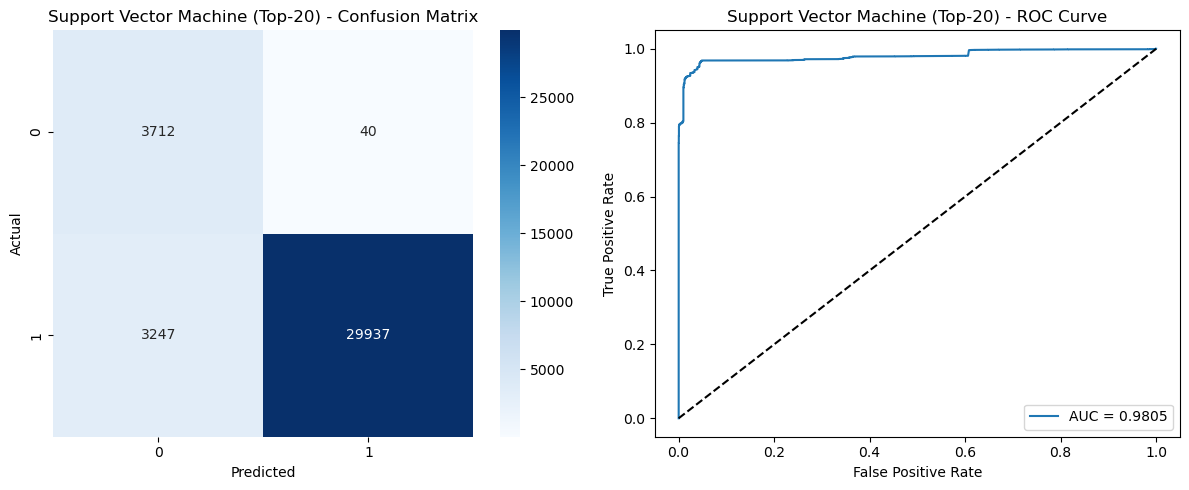

In [53]:
svm_top_k = LinearSVC(max_iter=10000)
svm_top_k.fit(X_train_top_k, y_train_sm)
evaluate_model(svm_top_k, X_train_top_k, y_train_sm, X_test_top_k, y_test, model_name="Support Vector Machine (Top-20)")


--- Support Vector Machine (Percentile) ---
Accuracy:  0.8723
Precision: 0.9985
Recall:    0.8592
F1-score:  0.9236
ROC AUC:   0.9245
5-Fold CV F1-score: Mean=0.9218, Std=0.0009


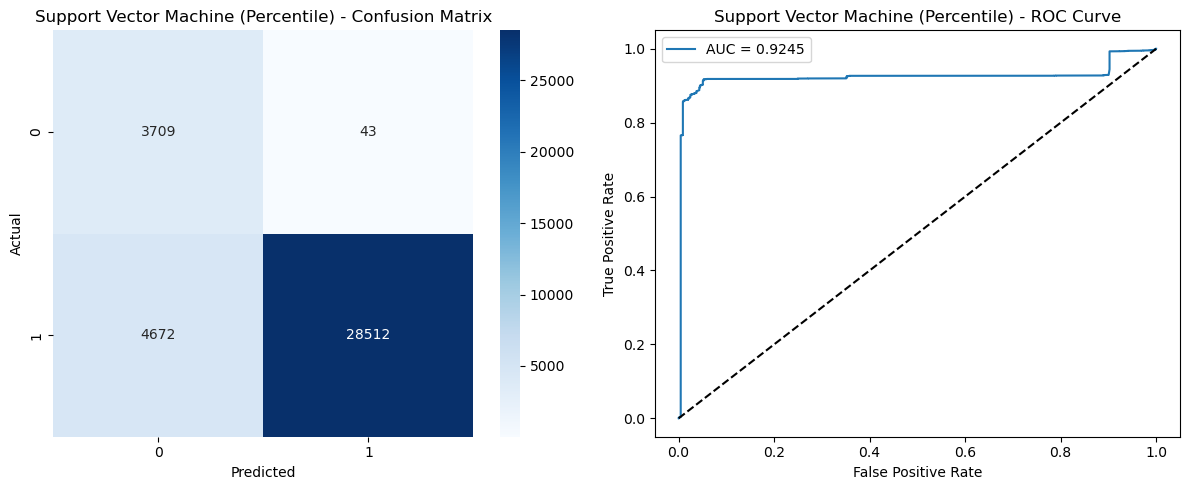

In [54]:
svm_percentile = LinearSVC(max_iter=10000)
svm_percentile.fit(X_train_percentile, y_train_sm)
evaluate_model(svm_percentile, X_train_percentile, y_train_sm, X_test_percentile, y_test, model_name="Support Vector Machine (Percentile)")

K-Nearest Neighbors (KNN)


--- K-Nearest Neighbors (Top-20) ---
Accuracy:  0.9949
Precision: 0.9983
Recall:    0.9959
F1-score:  0.9971
ROC AUC:   0.9965
5-Fold CV F1-score: Mean=0.9938, Std=0.0011


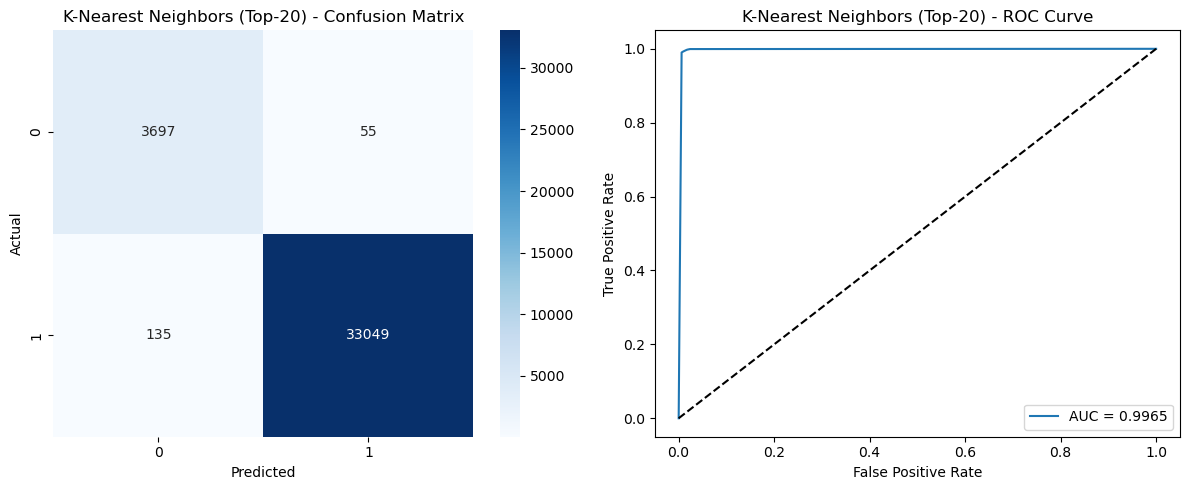

In [55]:
knn_top_k = KNeighborsClassifier(n_neighbors=5)
knn_top_k.fit(X_train_top_k, y_train_sm)
evaluate_model(knn_top_k, X_train_top_k, y_train_sm, X_test_top_k, y_test, model_name="K-Nearest Neighbors (Top-20)")


--- K-Nearest Neighbors (Percentile) ---
Accuracy:  0.9951
Precision: 0.9985
Recall:    0.9961
F1-score:  0.9973
ROC AUC:   0.9964
5-Fold CV F1-score: Mean=0.9940, Std=0.0011


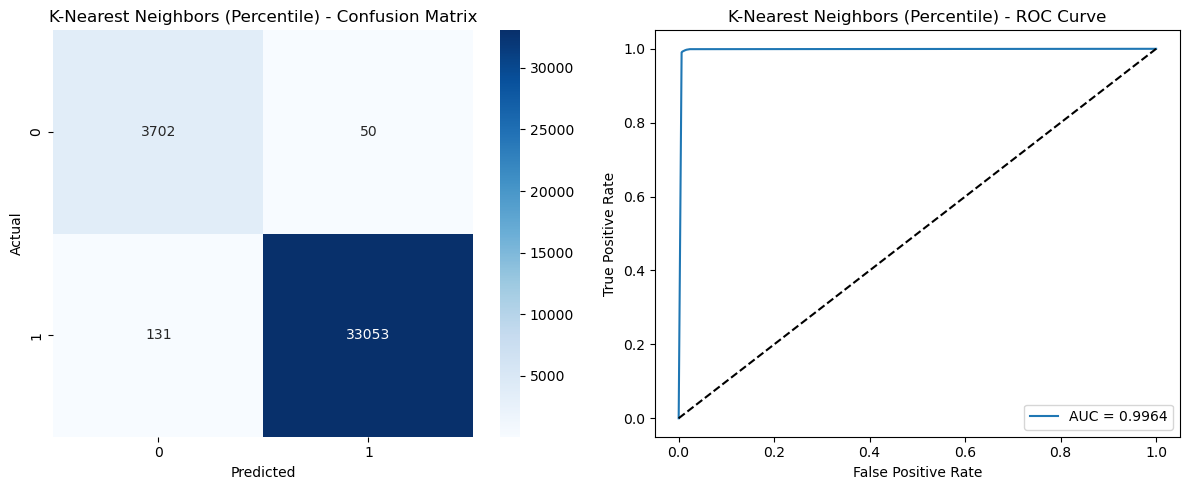

In [56]:
knn_percentile = KNeighborsClassifier(n_neighbors=5)
knn_percentile.fit(X_train_percentile, y_train_sm)
evaluate_model(knn_percentile, X_train_percentile, y_train_sm, X_test_percentile, y_test, model_name="K-Nearest Neighbors (Percentile)")

Gradient Boosting Regression 


--- Gradient Boosting (Top-20) ---
Accuracy:  0.9919
Precision: 0.9989
Recall:    0.9921
F1-score:  0.9955
ROC AUC:   0.9996
5-Fold CV F1-score: Mean=0.9943, Std=0.0004


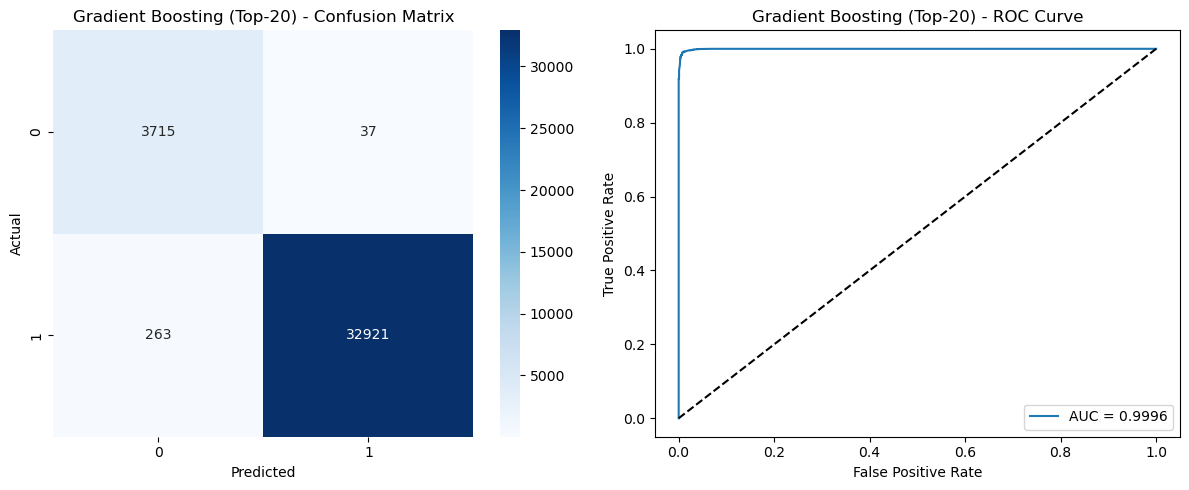

In [57]:
gb_top_k = GradientBoostingClassifier(random_state=42)
gb_top_k.fit(X_train_top_k, y_train_sm)
evaluate_model(gb_top_k, X_train_top_k, y_train_sm, X_test_top_k, y_test, model_name="Gradient Boosting (Top-20)")


--- Gradient Boosting (Percentile) ---
Accuracy:  0.9909
Precision: 0.9988
Recall:    0.9910
F1-score:  0.9949
ROC AUC:   0.9995
5-Fold CV F1-score: Mean=0.9930, Std=0.0002


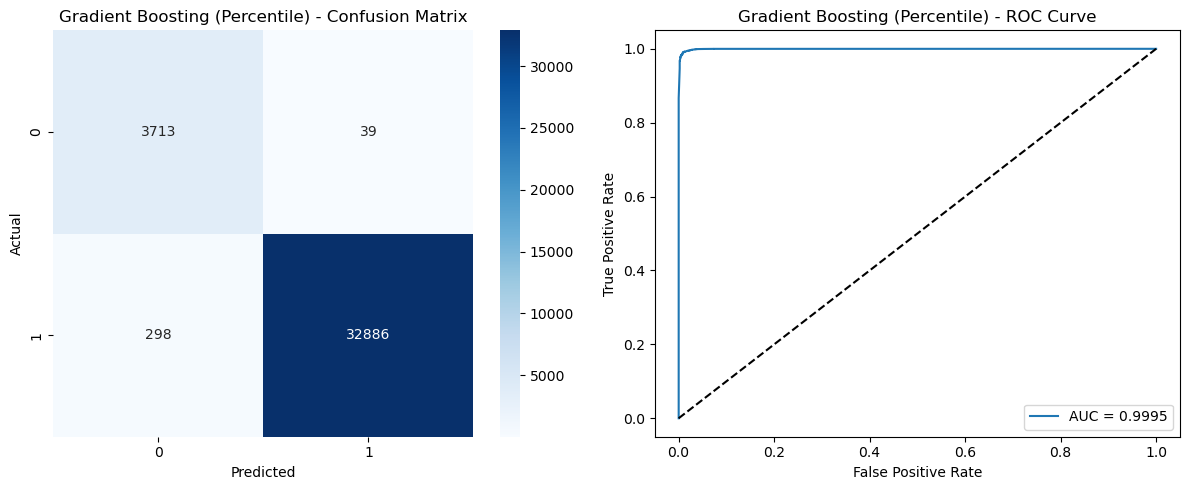

In [58]:
gb_percentile = GradientBoostingClassifier(random_state=42)
gb_percentile.fit(X_train_percentile, y_train_sm)
evaluate_model(gb_percentile, X_train_percentile, y_train_sm, X_test_percentile, y_test, model_name="Gradient Boosting (Percentile)")

In [59]:
print(results)

[{'ModelName': 'Decision Tree (Top-20)', 'Accuracy': 0.996, 'Precision': 0.9989, 'Recall': 0.9966, 'F1_score': 0.9978, 'ROC_AUC': 0.9955, 'CV_F1_mean': 0.9969, 'CV_F1_std': 0.0003}, {'ModelName': 'Decision Tree (Percentile)', 'Accuracy': 0.9964, 'Precision': 0.9991, 'Recall': 0.9969, 'F1_score': 0.998, 'ROC_AUC': 0.996, 'CV_F1_mean': 0.9972, 'CV_F1_std': 0.0002}, {'ModelName': 'Logistic Regression (Top-20)', 'Accuracy': 0.9017, 'Precision': 0.9984, 'Recall': 0.8919, 'F1_score': 0.9422, 'ROC_AUC': 0.9803, 'CV_F1_mean': 0.937, 'CV_F1_std': 0.0006}, {'ModelName': 'Logistic Regression (Percentile)', 'Accuracy': 0.8726, 'Precision': 0.9983, 'Recall': 0.8597, 'F1_score': 0.9238, 'ROC_AUC': 0.9379, 'CV_F1_mean': 0.921, 'CV_F1_std': 0.0008}, {'ModelName': 'Random Forest (Top-20)', 'Accuracy': 0.9965, 'Precision': 0.9992, 'Recall': 0.9969, 'F1_score': 0.998, 'ROC_AUC': 0.9999, 'CV_F1_mean': 0.9976, 'CV_F1_std': 0.0003}, {'ModelName': 'Random Forest (Percentile)', 'Accuracy': 0.9969, 'Precision'

In [60]:
results_df = pd.DataFrame(results)

In [61]:
results_df.to_csv("model_summary.csv", index=False)

### 10. Confidence Score Integration

In [62]:
best_model = rf_percentile
y_pred = best_model.predict(X_test_percentile)
confidence_scores = best_model.predict_proba(X_test_percentile)[:, 1]
results_df = pd.DataFrame({
    'TrueLabel': y_test,
    'PredictedLabel': y_pred,
    'ConfidenceScore': confidence_scores
})

In [63]:
print(results_df)

        TrueLabel  PredictedLabel  ConfidenceScore
61746           1               1         1.000000
59500           1               1         1.000000
13247           1               1         1.000000
3385            0               0         0.000000
76780           1               1         1.000000
...           ...             ...              ...
113905          1               1         1.000000
48670           1               1         1.000000
122311          1               1         0.987101
122121          1               1         0.987101
5463            0               0         0.000000

[36936 rows x 3 columns]


In [64]:
results_df = pd.DataFrame(results_df)  # 'results' is your evaluation list
results_df.to_csv('best_model.csv', index=False)

In [67]:
low_confidence_false_negatives = results_df[
    (results_df['ConfidenceScore'] < 0.5) & 
    (results_df['TrueLabel'] == 1)
]

print(low_confidence_false_negatives)

        TrueLabel  PredictedLabel  ConfidenceScore
19474           1               0         0.242812
119061          1               0         0.210000
119817          1               0         0.025266
18727           1               0         0.242812
16624           1               0         0.242812
...           ...             ...              ...
16931           1               0         0.242812
17897           1               0         0.242812
19591           1               0         0.242812
18345           1               0         0.242812
17441           1               0         0.290000

[89 rows x 3 columns]
